# **Multiple Instance Analysis**

In [18]:
#@title Import Statements / Mounting Google drive
#import statements
from google.colab import drive
import json
import zipfile
import json
import pandas as pd
import numpy as np
import requests
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sn


#mount the google drive, 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
#@title Depricated function to read zip files from the google drive
#Function to read contents from the files in zip and store in the list
#The function is not used, because  data is mocked in json files downloaded from the Firebase realtime database

#uploading zip folder in the your drive and specifying the path in variables and storing in the list
path_varA = '/content/drive/MyDrive/KEPIA_2576183S/Data/SetA1.zip'
path_varB = '/content/drive/MyDrive/KEPIA_2576183S/Data/SetB.zip'
path_varC = '/content/drive/MyDrive/KEPIA_2576183S/Data/SetC.zip'
path_varD = '/content/drive/MyDrive/KEPIA_2576183S/Data/SetD.zip'
path_varE = '/content/drive/MyDrive/KEPIA_2576183S/Data/SetE.zip'
path_varF = '/content/drive/MyDrive/KEPIA_2576183S/Data/SetF.zip'

path_list = [path_varA,path_varB,path_varC,path_varD, path_varE, path_varF]
def get_content_of_file_in_list(path_var):
  zip_instance = zipfile.ZipFile(path_var)
  file_data_list = []
  for text_file in zip_instance.infolist():
    if (text_file.file_size):
      with zip_instance.open(text_file.filename) as inner_file: #error 
          if text_file.file_size == 0:
              continue
          if str(text_file.filename).startswith('__MACOSX/'):
              continue
          if '.DS_Store' in str(text_file.filename):
              continue

          instance = json.load(inner_file)
          file_data_list.append(instance)
          if len(file_data_list) == 50:
            break
  return file_data_list

recipient_list = []
payload_list = []
donor_list = []
url = ('https://kidney-nhs.optimalmatching.com/kidney/find.json')

# file_list = get_content_of_file_in_list(path_list[0])
file_list = []
for instance in file_list:
  donor = instance['data']
  donor_list.append(donor)
  recipient_list.append(instance['recipients'])
  kep_instance_dict = {'data': donor}
  kep_instance_obj = {'operation': 'maxcard','altruistic_chain_length': 2, 'data': json.dumps(kep_instance_dict)}
  url = ('https://kidney-nhs.optimalmatching.com/kidney/find.json')
  response = requests.post(url, data = kep_instance_obj)
  print(response)
  payload = response.json()
  payload_list.append(payload)

# function call to read a zip file stored in drive
# get_content_of_file_in_list(path_varA)

In [20]:
#@title Function to read mocked json files from google drive and extracting donor, recipient and payload
#importing data from json files
json_path_varA = '/content/drive/MyDrive/KEPIA_2576183S/Data/kepia-rdb-default-rtdb-SetA-export.json'
json_path_varB = '/content/drive/MyDrive/KEPIA_2576183S/Data/kepia-rdb-default-rtdb-SetB-export.json'
json_path_varC = '/content/drive/MyDrive/KEPIA_2576183S/Data/kepia-rdb-default-rtdb-SetC-export.json'
json_path_varD = '/content/drive/MyDrive/KEPIA_2576183S/Data/kepia-rdb-default-rtdb-SetD-export.json'
json_path_varE = '/content/drive/MyDrive/KEPIA_2576183S/Data/kepia-rdb-default-rtdb-SetE-export.json'
json_path_varF = '/content/drive/MyDrive/KEPIA_2576183S/Data/kepia-rdb-default-rtdb-SetF-export.json'
json_path_varG = '/content/drive/MyDrive/KEPIA_2576183S/Data/kepia-rdb-default-rtdb-SetG-export.json'

path_list = [json_path_varA,json_path_varB, json_path_varC, json_path_varD, json_path_varE, json_path_varF]

def get_data(json_path_var, filename = 'set'):
  with open(json_path_var) as json_file: 
    instance = json.load(json_file)

  donor_list = []
  recipient_list = []
  payload_list = []
  
  for key in instance.keys():
    donor = instance.get(key).get('donor')
    recipients = instance.get(key).get('recipients')
    payload = instance.get(key).get('payload')
    donor_list.append(donor)
    recipient_list.append(recipients)
    payload_list.append(payload)

    if filename == 'SetB':
      donor_final_list = donor_list
      recipient_final_list = recipient_list
      payload_final_list = payload_list

    else:

      donor_final_list = []
      recipient_final_list = [] 
      payload_final_list = []

      for donors_in_file in donor_list:
        i = 0
        donor_dict = {}
        for donors in donors_in_file:

            if donors is None:
                continue
            donor_dict[str(i)] = donors
            i = i+1
        donor_final_list.append(donor_dict)


      for recipients_in_file in recipient_list:
        j = 0
        recipient_dict = {}
        for recipients in recipients_in_file:
            if recipients is None:
                continue
            recipient_dict[str(j)] = recipients
            j = j+1
        recipient_final_list.append(recipient_dict)

      for payload_in_file in payload_list:
          if payload_in_file is None:
              continue
          payload_final_list.append(payload_in_file)

  return donor_final_list, recipient_final_list, payload_final_list

In [22]:
#@title Reading sub_components (donor, recipient and payload) for all the sets
#creating separate list, so that each set can be analysed individually, means will not have to run other sets for the same
donor_listA, recipient_listA, payload_listA = get_data(json_path_varA)
donor_listB, recipient_listB, payload_listB = get_data(json_path_varB, 'SetB')
donor_listC, recipient_listC, payload_listC = get_data(json_path_varC)
donor_listD, recipient_listD, payload_listD = get_data(json_path_varD)
donor_listE, recipient_listE, payload_listE = get_data(json_path_varE)
donor_listF, recipient_listF, payload_listF = get_data(json_path_varF)
donor_listG, recipient_listG, payload_listG = get_data(json_path_varA)

#creating list, to run all sets together
all_set_donors = [donor_listA,donor_listB,donor_listC,donor_listD,donor_listE,donor_listF,donor_listG]
all_set_recipients = [recipient_listA, recipient_listB, recipient_listC, recipient_listD, recipient_listE, recipient_listF,recipient_listG]
all_set_payload = [payload_listA, payload_listB, payload_listC, payload_listD, payload_listE, payload_listF, payload_listG]

In [23]:
#@title All utility functions
#all utility functions
# counts the no. of matches for donors
def count_matches(row):
  if isinstance((row['matches']), list) :
    return int(len(row['matches']))
  else:
    return 0
# counts the sources for donors in multiple sources
def count_sources(donor):
  x = donor['sources'].value_counts(dropna = 'True')
  y = x.where(x > 1).value_counts(dropna = 'True').sum()
  return y
# blood type distribution in donors/recipients
def count_blood_distribution(donor):
  a = 0
  b = 0
  o = 0
  ab = 0

  btvalues = donor['bloodtype'].value_counts()
  ind = btvalues.index.tolist()
  for idx,bt in enumerate(ind):
    if bt =='A':
      a = btvalues[idx]
    if bt =='O':
      o = btvalues[idx]
    if bt =='B':
      b = btvalues[idx]
    if bt =='AB':
      ab = btvalues[idx]
  return a,o,b,ab

# Utility to calculate unique CPRA
def Calculate_unique_cpra(recipients_list1):
  recipients_list1df = pd.DataFrame(recipients_list1).T
  list1 = recipients_list1df['cPRA'].value_counts()
  # cpra = pd.DataFrame(dict(list,))
  # cpra
  number_of_recipients = list1.to_dict().values()
  cpra_value = list1.to_dict().keys()
  a = {'number_of_recipients':number_of_recipients, 'cpra_value':cpra_value}
  cpradf = pd.DataFrame(a)
  return cpradf

# Count compatiblity for recipients of an instance in a set
def count_compatible(recipients):
  ncompatible,compatible = 0,0
  values = recipients['hasBloodCompatibleDonor'].value_counts()
  ind = values.index.tolist()
  
  for idx,comp in enumerate(ind):
    if comp == True:
      compatible = values[idx]
    else:
      ncompatible = values[idx]
  return ncompatible,compatible

# calcylates type of one cycle
def per_cycle(df):
    c2 = 0
    c3 = 0
    sc = 0
    lc = 0
    is_altruistic = False
    rows = len(df)
    type = ''
    if 'a' in df:
        is_altruistic = True

    if rows == 2:
         if is_altruistic:
             sc = 1
             type = 'Short chain'

         else:
             c2 = 1
             type = 'Two cycle'
    elif rows == 3:
        if is_altruistic:
            lc = 1
            type = 'Long chain'
        else:
            c3 = 1
            type = 'Three cycle'
    return c2,c3,sc,lc,type

# calculating all cycles types
def calculate_cycles_chains(payload,ids):
    cycle_2 = []
    cycle_3 = []
    s_chain = []
    l_chain = []
    for i in ids:
      c2 = 0
      c3 = 0
      sc = 0
      lc = 0
      type =''

      if i == 0:
          continue
      if i == len(payload.get('output').get('all_cycles')):
          break

      # a = payload.get('output').get('all_cycles').get(str(i)).get('cycle')
      # df = pd.DataFrame(a)

      a = payload.get('output').get('all_cycles')[int(i)].get('cycle')
      df = pd.DataFrame(a)

      c2,c3,sc,lc,type = per_cycle(df)

      cycle_2.append(c2)
      cycle_3.append(c3)
      s_chain.append(sc)
      l_chain.append(lc)

    return cycle_2, cycle_3, s_chain, l_chain





In [24]:
#@title Function to create dataframes for donors and recipients in the set

def create_donor_dataframe(donor_list):
  donors_count, no_matches_list,avg_total_matches_list,max_matches_list,min_matches_list,non_alt_list,alt_list,multiple_sources_l,avg_age_l, med_age_l ,min_age_l ,max_age_l ,a_type_l , b_type_l ,o_type_l ,ab_type_l  = [], [], [],[], [], [],[], [], [],[], [], [],[], [], [] ,[]

  for donor_sub in donor_list:
    number_of_donors ,no_matches ,average_total_matches ,max_matches ,min_matches ,non_alt ,alt ,multiple_sources ,avg_age ,med_age ,min_age ,max_age ,a,o,b,ab = 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

    donor = pd.DataFrame(donor_sub).T
    donor['matcoun'] = donor.apply(lambda row: (count_matches(row)) ,axis = 1)

    #Calculating values
    number_of_donors = donor.shape[0]
    average_total_matches = donor['matcoun'].mean()
    max_matches = donor['matcoun'].max()
    min_matches = donor['matcoun'].min()
    no_matches= donor['matcoun'].isnull().sum()
    non_alt = donor['altruistic'].isnull().sum()
    alt = number_of_donors - non_alt
    multiple_sources = count_sources(donor)
    avg_age = donor['dage'].mean()
    med_age = donor['dage'].median()
    min_age =donor['dage'].min()
    max_age = donor['dage'].max()
    a,o,b,ab = count_blood_distribution(donor)


    #appending to list
    donors_count.append(number_of_donors)
    no_matches_list.append(no_matches)
    avg_total_matches_list.append(average_total_matches)
    min_matches_list.append(min_matches)
    max_matches_list.append(max_matches)
    non_alt_list.append(non_alt)
    alt_list.append(alt)
    multiple_sources_l.append(multiple_sources)
    avg_age_l.append(avg_age)
    med_age_l.append(med_age)
    min_age_l.append(min_age)
    max_age_l.append(max_age)
    a_type_l.append(a)
    b_type_l.append(b)
    o_type_l.append(o)
    ab_type_l.append(ab)

  instance_ids = list(range(1, len(donor_list)+1))

  donor_instance_list_data = {
      'Instance Id': instance_ids,
      'No. of Donors':donors_count,
      'Avg No. of Matches': avg_total_matches_list,
      'Donors with No Matches': no_matches_list,
      'Min No. of matches':min_matches_list,
      'Max No. of matches':max_matches_list,
      'Altruistic donors':alt_list,
      'Non Altruistuc donors:':non_alt_list,
      'Sources with multiple donors':multiple_sources_l,
      'Average Age':avg_age_l,
      'Min Age':min_age_l,
      'Max Age':max_age_l,
      'Median age':med_age_l,
      'A boodtype Avg':a_type_l,
      'B boodtype Avg':b_type_l,
      'O boodtype Avg':o_type_l,
      'AB boodtype Avg':ab_type_l,    
  }
  donor_instances_df = pd.DataFrame(donor_instance_list_data)
  return donor_instances_df

def create_recipient_dataframe(recipients_list):
  number_of_recipients_l, non_compatible_l ,compatible_l ,a_l ,o_l,b_l ,ab_l ,cPRA_mean_l ,cPRA_median_l ,cPRA_std_deviation_l = [],[],[],[],[],[],[],[],[],[]
  
  for recipients in recipients_list:
      number_of_recipients ,non_compatible ,compatible ,a,o,b,ab ,cPRA_mean ,cPRA_median ,cPRA_std_deviation = 0,0,0,0,0,0,0,0,0,0

      recipients_df = pd.DataFrame(recipients).T

      number_of_recipients = recipients_df.shape[0]
      non_compatible,compatible = count_compatible(recipients_df)
      a,o,b,ab = count_blood_distribution(recipients_df)
      cPRA_mean = recipients_df['cPRA'].mean()
      cPRA_median = recipients_df['cPRA'].median()
      cPRA_std_deviation = recipients_df['cPRA'].std()


      number_of_recipients_l.append(number_of_recipients)
      non_compatible_l.append(non_compatible)
      compatible_l.append(compatible)
      a_l.append(a)
      o_l.append(o)
      b_l.append(b)
      ab_l.append(ab)
      cPRA_mean_l.append(cPRA_mean)
      cPRA_median_l.append(cPRA_median)
      cPRA_std_deviation_l.append(cPRA_std_deviation)

  instance_ids = list(range(1, len(recipients_list)+1))

  recipients_instances_data = { 
  'Instance id': instance_ids,
  'Number of recipients_l':number_of_recipients_l,
  'No compatible donor':non_compatible_l,
  'Has compatible donor': compatible_l,
  'A bloodtype avg' : a_l,
  'O bloodtype avg': o_l,
  'B bloodtype avg': b_l,
  'AB bloodtype avg': ab_l,
  'cPRA mean' : cPRA_mean_l,
  'cPRAm median' : cPRA_median_l,
  'cPRA std_deviation': cPRA_std_deviation_l
  }
  
  recipients_instances_fin_df = pd.DataFrame(recipients_instances_data)
  return recipients_instances_fin_df


In [25]:
#@title Function to create dataframes for all cycles in the set
def create_payload_dataframe(payload_list):
    no_of_cycles_l ,no_of_two_cycles ,no_of_three_cycles ,no_of_short_chains_l ,no_of_long_chains_l ,weight_avg_l ,weight_median_l ,weight_std_l ,cycles_with_backarcs_l = [],[],[],[],[],[],[],[],[]

    for payload in payload_list:
      no_of_cycles,no_two_cycles , no_three_cycles ,no_of_short_chains ,no_of_long_chains ,weight_avg ,weight_median ,weight_std = 0,0,0,0,0,0,0,0
      
      # all_ids = []
      # all_cycles = payload.get('output').get('all_cycles')
      # for i in all_cycles:
      #       all_ids.append(i)
      # all_cycle_dataframe = pd.DataFrame(all_cycles).T

      all_cycles_dict = {}
      all_ids = []
      all_cycles = payload.get('output').get('all_cycles')
      k = 1
      
      for cycle in all_cycles:
          if cycle is None:
              continue
          all_cycles_dict[str(k)] = cycle
          all_ids.append(str(k))
          k = k+1

      all_cycle_dataframe = pd.DataFrame(all_cycles_dict).T   
      
     
      # all_cycle_dataframe = all_cycle_dataframe.astype({'cycle': 'str' })
      # all_cycle_dataframe = all_cycle_dataframe.astype({'alt' : 'str'})
      
      no_of_cycles = len(all_cycle_dataframe)
 
      
      cycle_2, cycle_3, s_chain, l_chain = calculate_cycles_chains(payload,all_ids)
      
      
      all_cycle_dataframe['Two cycles'] = cycle_2
      all_cycle_dataframe['Three cycles'] = cycle_3
      all_cycle_dataframe['Short Chains'] = s_chain
      all_cycle_dataframe['Long Chains'] = l_chain

      no_two_cycles = all_cycle_dataframe['Two cycles'].sum()
      no_three_cycles = all_cycle_dataframe['Three cycles'].sum()
      no_of_short_chains = all_cycle_dataframe['Short Chains'].sum()
      no_of_long_chains = all_cycle_dataframe['Long Chains'].sum()

      weight_avg = all_cycle_dataframe['weight'].mean()
      weight_median = all_cycle_dataframe['weight'].median()
      weight_std = all_cycle_dataframe['weight'].std()
      cycles_with_backarcs = len(all_cycle_dataframe['backarcs'][all_cycle_dataframe['backarcs'] > 0])

      no_of_cycles_l.append(no_of_cycles)
      no_of_two_cycles.append(no_two_cycles)
      no_of_three_cycles.append(no_three_cycles)
      no_of_short_chains_l.append(no_of_short_chains)
      no_of_long_chains_l.append(no_of_long_chains)
      weight_avg_l.append(weight_avg)
      weight_median_l.append(weight_median)
      weight_std_l.append(weight_std)
      cycles_with_backarcs_l.append(cycles_with_backarcs)

    instance_ids = list(range(1, len(payload_list)+1))
    
    payload_all_cycle_data = {
    'Instance Ids' : instance_ids,
    'No of Cycles' : no_of_cycles_l ,
    'No of Two Cycles' : no_of_two_cycles ,
    'No of Three Cycles' : no_of_three_cycles,
    'No of Short chains' : no_of_short_chains_l ,
    'No of Long chains' : no_of_long_chains_l ,
    'weight Avg' : weight_avg_l ,
    'weight Median' : weight_median_l ,
    'weight std' : weight_std_l ,
    'No Cycles with backarcs' : cycles_with_backarcs_l
    }

    payload_fin_df = pd.DataFrame(payload_all_cycle_data)
    return payload_fin_df

In [29]:

#@title Function to create dataframes for exchange  cycle in the set
def create_exchange_dataframe(payload_list):
  no_exc_cycles = []
  weight_l = []
  two_way_exc_l = []
  three_way_exc_l = []
  total_transplants_l = []
  no_of_two_cycles_l = []
  no_of_three_cycles_l = []
  no_of_short_chains_l = []
  no_of_long_chains_l = []
  weight_avg_l = []
  weight_median_l = []
  weight_std_l = []
  cycles_with_backarcs_l = []

  for payload in payload_list:
    exchange_data = payload.get('output').get('exchange_data')[0]
    exchanges = exchange_data.get('exchanges')
    weight_l.append(exchange_data.get('weight'))
    two_way_exc_l.append(exchange_data.get('two_way_exchanges'))
    three_way_exc_l.append(exchange_data.get('three_way_exchanges'))
    total_transplants_l.append(exchange_data.get('total_transplants'))

    exc_cycle_ids = []
    exchange_cycle_list = []
    for i in exchanges:
      exc_cycle_ids.append(str(i))
      exchange_cycle_list.append(payload.get('output').get('all_cycles')[i])
    exc_cycle_df = pd.DataFrame(exchange_cycle_list)
  
    no_exc_cycles.append(len(exc_cycle_df))

    cycle_2, cycle_3, s_chain, l_chain = calculate_cycles_chains(payload,exc_cycle_ids)
    exc_cycle_df['Two cycles'] = cycle_2
    exc_cycle_df['Three cycles'] = cycle_3
    exc_cycle_df['Short Chains'] = s_chain
    exc_cycle_df['Long Chains'] = l_chain

    no_of_two_cycles_l.append(exc_cycle_df['Two cycles'].sum())
    no_of_three_cycles_l.append(exc_cycle_df['Three cycles'].sum())
    no_of_short_chains_l.append(exc_cycle_df['Short Chains'].sum())
    no_of_long_chains_l.append(exc_cycle_df['Long Chains'].sum())

    weight_avg_l.append(exc_cycle_df['weight'].mean())
    weight_median_l.append(exc_cycle_df['weight'].median())
    weight_std_l.append(exc_cycle_df['weight'].std())
    cycles_with_backarcs_l.append(len(exc_cycle_df['backarcs'][exc_cycle_df['backarcs'] > 0]))

  instance_ids = list(range(1, len(payload_list)+1))
  exchange_data_instances = {
  'Instance Ids' : instance_ids,
  'No. of Exchange Cycles' : no_exc_cycles,
  'Weight of exchanges': weight_l,
  'Two - way echange': two_way_exc_l,
  'Three Way exchange':three_way_exc_l ,
  'Total Transplants': total_transplants_l ,
  'Np. of two cyles': no_of_two_cycles_l ,
  'No. of three cycles' : no_of_three_cycles_l ,
  'No. of short chains':no_of_short_chains_l ,
  'No. of long chains' : no_of_long_chains_l,
  'Cycle Containing Backarcs' : cycles_with_backarcs_l,
  'Avg weight of exc cycles' : weight_avg_l ,
  'Median weight of exc cycles':weight_median_l ,
  'Std weight of exc cycles':weight_std_l
  }

  exchange_data_final_df = pd.DataFrame(exchange_data_instances)
  return exchange_data_final_df



In [118]:
#@title creating donor, recipient , exchange and payload datfarme
#creating a donor, recipient , payload and exchange data dataframe list  for each set

# all_sets_donor_dataframe_list = []
# for donor_list in all_set_donors:
#   all_sets_donor_dataframe_list.append(create_donor_dataframe(donor_list))

# all_sets_recipient_dataframe_list = []
# for recipient in all_set_recipients:
#   all_sets_recipient_dataframe_list.append(create_recipient_dataframe(recipient))  

# all_sets_payload_dataframe_list = []
# for payload_list in all_set_payload:
#    all_sets_payload_dataframe_list.append(create_payload_dataframe(payload_list))

# all_sets_exchanges_dataframe_list = []
# for payload_list in all_set_payload:
#   all_sets_exchanges_dataframe_list.append(create_exchange_dataframe(payload_list))

# For development purposes only creating dataframes for one set
donor_listA_df = create_donor_dataframe(donor_listA)
recipient_listA_df = create_recipient_dataframe(recipient_listA)
payload_listA_df = create_payload_dataframe(payload_listA)
exchanges_listA_df = create_exchange_dataframe(payload_listA)

#Analysing Donors


In [92]:
#@title
x = donor_listA_df.copy()
del x['Instance Id']
a = pd.DataFrame(x.describe().iloc[[1,2,3,4,5,6,7]])
# print("1. checking for duplicate intances with similar donor distributions --- ")
if x.duplicated().all():
  print('1. Intances contain similar distribution of donors')
else:
  print('1. No similar donors distribution in the set')

# filling all the null values with 0 if any
x.fillna(0)

print("2. Displaying the donor data distribution within the set")
x.head(10)

1. No similar donors distribution in the set
2. Displaying the donor data distribution within the set


,No. of Donors,Avg No. of Matches,Donors with No Matches,Min No. of matches,Max No. of matches,Altruistic donors,Non Altruistuc donors:,Sources with multiple donors,Average Age,Min Age,Max Age,Median age,A boodtype Avg,B boodtype Avg,O boodtype Avg,AB boodtype Avg
0,203,24.596059,0,0,67,2,201,18,42.847291,18,68,43.0,101,31,63,8
1,206,22.427184,0,0,54,2,204,19,43.966019,18,68,45.0,96,15,86,9
2,200,22.500000,0,0,62,2,198,14,43.560000,18,68,42.5,105,27,65,3
3,193,30.383420,0,0,70,2,191,10,41.036269,18,68,41.0,78,37,72,6
4,200,18.875000,0,0,49,2,198,14,43.970000,18,68,44.0,86,30,78,6
5,207,28.628019,0,1,70,2,205,21,42.710145,18,68,42.0,101,30,70,6
6,193,23.352332,0,0,61,2,191,10,44.388601,18,68,46.0,96,22,67,8
7,204,26.632353,0,0,61,2,202,16,42.362745,18,68,43.0,99,23,77,5
8,196,26.734694,0,0,68,2,194,11,43.000000,18,68,43.0,100,25,67,4
9,204,25.078431,0,0,68,2,202,17,44.362745,18,68,45.0,94,31,69,10


In [93]:
#@title
print("3. Analysing attributes of the donor dataframe")
print(x.dtypes)
print("4. Displaying the accumulative statistics")
a

3. Analysing attributes of the donor dataframe
No. of Donors                     int64
Avg No. of Matches              float64
Donors with No Matches            int64
Min No. of matches                int64
Max No. of matches                int64
Altruistic donors                 int64
Non Altruistuc donors:            int64
Sources with multiple donors      int64
Average Age                     float64
Min Age                           int64
Max Age                           int64
Median age                      float64
A boodtype Avg                    int64
B boodtype Avg                    int64
O boodtype Avg                    int64
AB boodtype Avg                   int64
dtype: object
4. Displaying the accumulative statistics


,No. of Donors,Avg No. of Matches,Donors with No Matches,Min No. of matches,Max No. of matches,Altruistic donors,Non Altruistuc donors:,Sources with multiple donors,Average Age,Min Age,Max Age,Median age,A boodtype Avg,B boodtype Avg,O boodtype Avg,AB boodtype Avg
mean,197.860000,22.361152,0.0,0.14000,60.520000,2.200000,195.660000,15.760000,43.095259,18.040000,68.0,43.200000,96.580000,29.560000,65.980000,5.740000
std,6.124591,2.794731,0.0,0.35051,6.178435,0.755929,6.313607,4.838451,1.003753,0.197949,0.0,1.732051,7.497183,5.043323,8.433388,2.126701
min,188.000000,16.736041,0.0,0.00000,46.000000,1.000000,186.000000,8.000000,41.036269,18.000000,68.0,40.000000,78.000000,15.000000,49.000000,1.000000
25%,193.000000,20.518342,0.0,0.00000,56.250000,2.000000,191.000000,11.000000,42.466909,18.000000,68.0,42.000000,92.000000,27.000000,60.250000,4.000000
50%,198.000000,22.385597,0.0,0.00000,61.000000,2.000000,196.000000,15.500000,43.036191,18.000000,68.0,43.000000,97.000000,30.000000,67.000000,5.500000
75%,203.000000,23.844860,0.0,0.00000,64.750000,3.000000,201.000000,19.750000,43.750751,18.000000,68.0,44.875000,101.750000,32.750000,70.750000,7.000000
max,211.000000,30.383420,0.0,1.00000,70.000000,3.000000,209.000000,26.000000,46.010363,19.000000,68.0,48.000000,110.000000,41.000000,86.000000,10.000000


-----------------------------------------
5. Distribution of altruistic and non-altruistic donors in the set


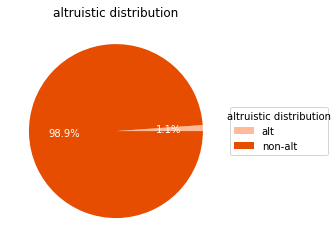

--distribution across individual sets


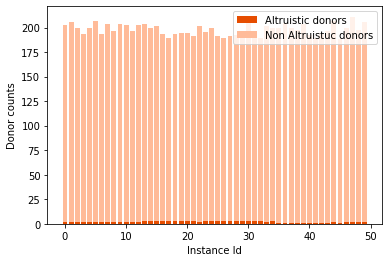

-----------------------------------------
6. Donors count distribution in the set


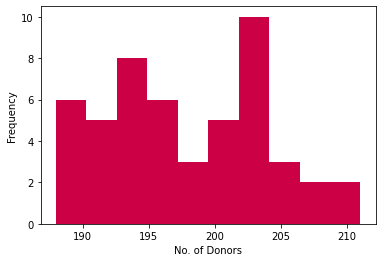

-----------------------------------------
7. Donors matches count distribution in the set


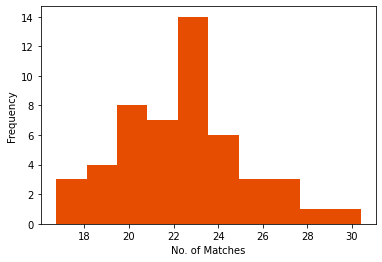

-----------------------------------------
8. Donors blodd type distribution in the set


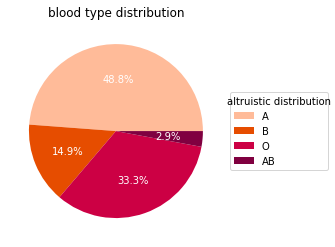

--distribution of blood type across individual sets


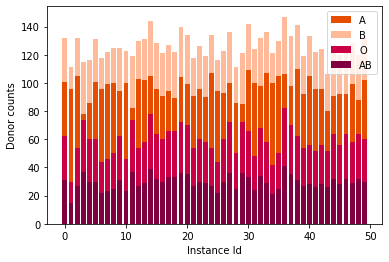

------------------------
9. Correlation Matrix


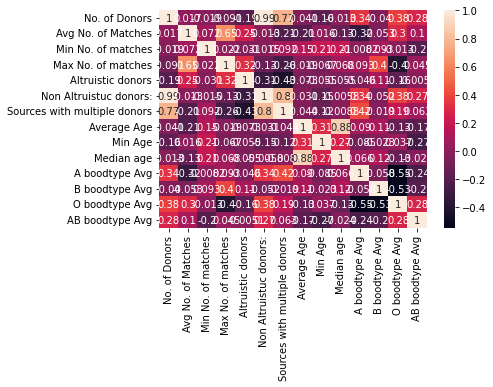

10 Plotting pairplots between the attributes


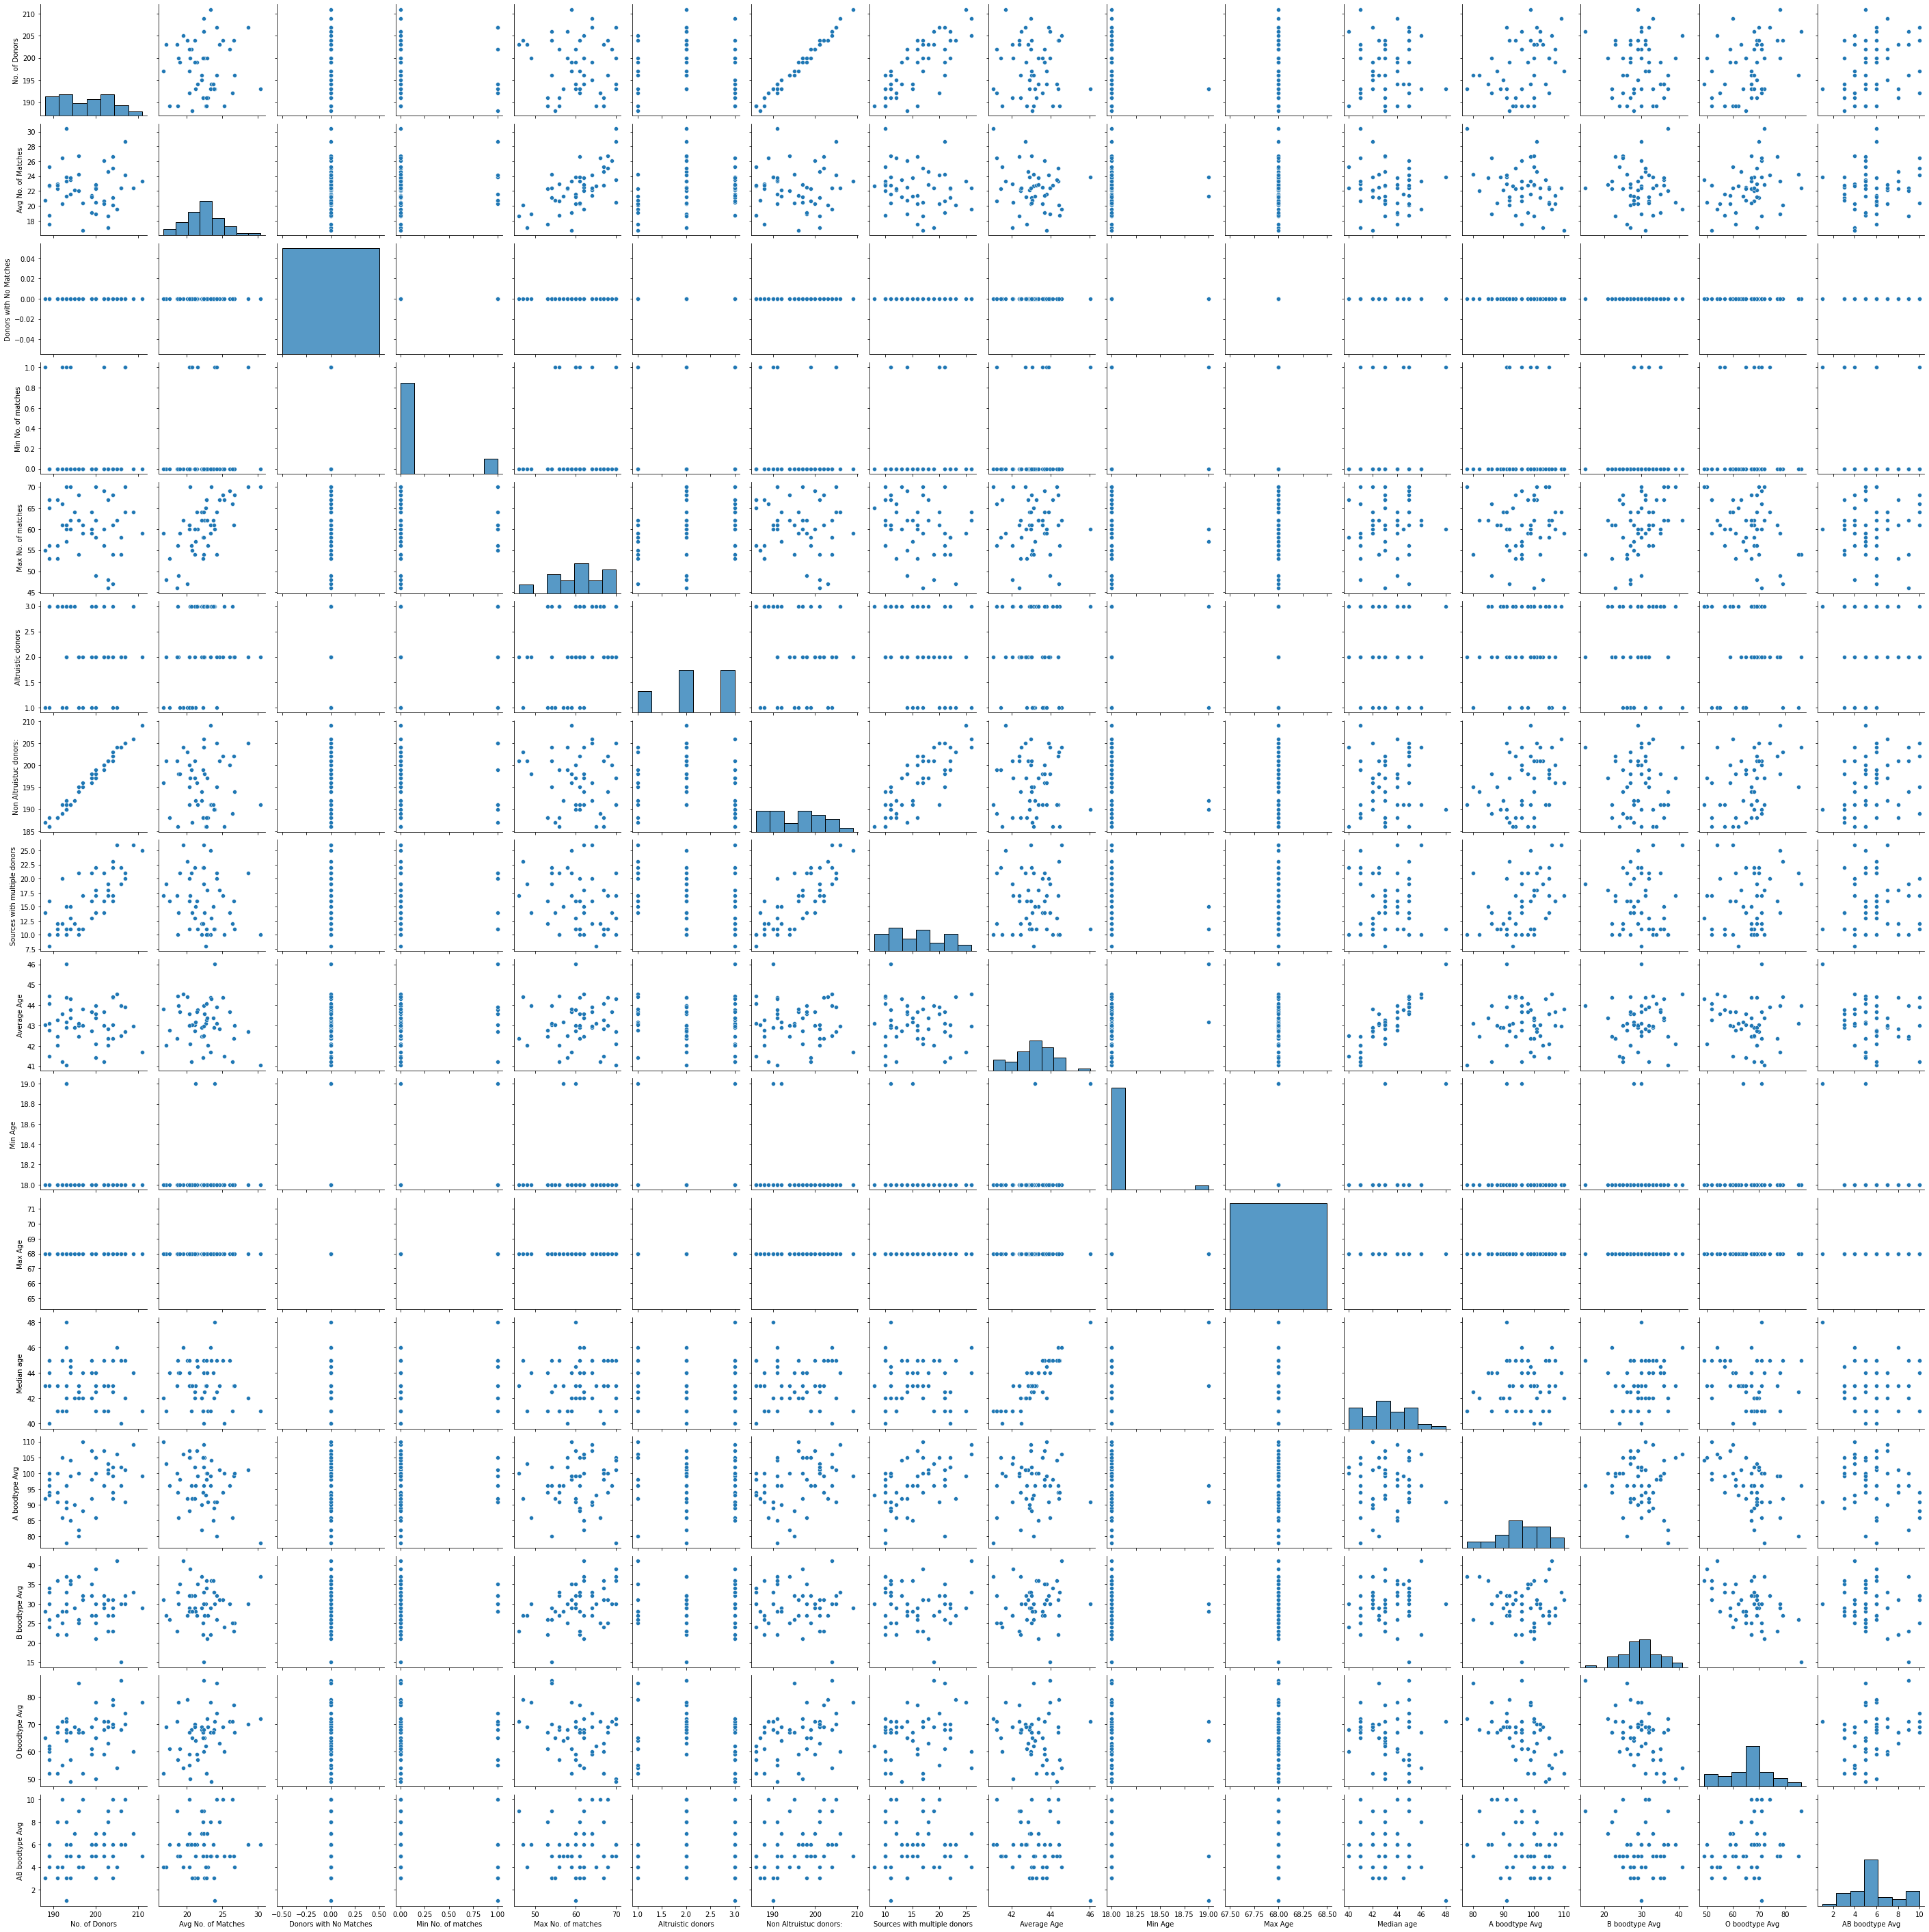

In [98]:
#@title
print("-----------------------------------------")
print("5. Distribution of altruistic and non-altruistic donors in the set")
y =[(x['Altruistic donors'].sum()/x['No. of Donors'].sum()), (x['Non Altruistuc donors:'].sum()/x['No. of Donors'].sum())]

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(y,  colors = ['#ffbb99', '#e64d00'],
autopct = '%1.1f%%',
textprops={ 'color':'white'})
ax.legend(wedges, ['alt','non-alt'],loc="center left",bbox_to_anchor=(1, 0, 0.5, 1),title = 'altruistic distribution' ,mode = 'expand')
plt.title ('altruistic distribution')
plt.show()

print("--distribution across individual sets")
data1 = x['Altruistic donors']
data2 = x['Non Altruistuc donors:']
plt.bar(range(len(data1)), data1, color = '#e64d00')
plt.bar(range(len(data2)), data2, bottom=data1, color = '#ffbb99')
plt.xlabel('Instance Id')
plt.ylabel('Donor counts')
plt.legend(['Altruistic donors','Non Altruistuc donors'])
plt.show()
print("-----------------------------------------")
print("6. Donors count distribution in the set")
fig, ax = plt.subplots()
ax.hist(x['No. of Donors'], color = '#cc0044')
ax.set_xlabel('No. of Donors')
ax.set_ylabel('Frequency')
plt.show()
print("-----------------------------------------")
print("7. Donors matches count distribution in the set")
fig, ax = plt.subplots()
ax.hist(x['Avg No. of Matches'], color = '#e64d00')
ax.set_xlabel('No. of Matches')
ax.set_ylabel('Frequency')
plt.show()
print("-----------------------------------------")
print("8. Donors blodd type distribution in the set")
total = x['No. of Donors']
a = x['A boodtype Avg']
b = x['B boodtype Avg']
c = x['O boodtype Avg']
d = x['AB boodtype Avg']

y =[(a.sum()/total.sum()),
    (b.sum()/total.sum()),
    (c.sum()/total.sum()),
    (d.sum()/total.sum())]

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(y,  colors = ['#ffbb99', '#e64d00','#cc0044', '#800040'],
autopct = '%1.1f%%',
textprops={ 'color':'white'})
ax.legend(wedges, ['A','B','O','AB'],loc="center left",bbox_to_anchor=(1, 0, 0.5, 1),title = 'altruistic distribution' ,mode = 'expand')
plt.title ('blood type distribution')
plt.show()

print("--distribution of blood type across individual sets")
a = x['A boodtype Avg']
b = x['B boodtype Avg']
c = x['O boodtype Avg']
d = x['AB boodtype Avg']
plt.bar(range(len(a)), a, color = '#e64d00')
plt.bar(range(len(b)), b, bottom=a, color = '#ffbb99')
plt.bar(range(len(c)), b, bottom=b, color = '#cc0044')
plt.bar(range(len(d)), b,  color = '#800040')

plt.xlabel('Instance Id')
plt.ylabel('Donor counts')
plt.legend(['A','B','O','AB'])
plt.show()
print("------------------------")
print("9. Correlation Matrix")
b = x.copy()
del b['Donors with No Matches']
del b['Max Age']
corrMatrix = b.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

print("10 Plotting pairplots between the attributes")
sn.pairplot(x)
plt.show()

#Analysing Recipients

In [99]:
#@title
x = recipient_listA_df.copy()
del x['Instance id']
a = pd.DataFrame(x.describe().iloc[[1,2,3,4,5,6,7]])
# print("1. checking for duplicate intances with similar recipient distributions --- ")
if x.duplicated().all():
  print('1. Intances contain similar recipients distribution')
else:
  print('1. No similar recipients distribution in the set')

# filling all the null values with 0 if any
x.fillna(0)

print("2. Displaying the recipient data distribution within the set")
x.head(10)

1. No similar recipients distribution in the set
2. Displaying the recipient data distribution within the set


,Number of recipients_l,No compatible donor,Has compatible donor,A bloodtype avg,O bloodtype avg,B bloodtype avg,AB bloodtype avg,cPRA mean,cPRAm median,cPRA std_deviation
0,181,100,81,44,113,20,4,0.679651,0.93,0.407978
1,181,97,84,47,112,17,5,0.739741,0.98,0.379437
2,181,94,87,49,106,20,6,0.690972,0.94,0.400507
3,181,101,80,37,116,20,8,0.650777,0.91,0.417292
4,181,98,83,50,110,16,5,0.782454,0.97,0.329146
5,181,96,85,39,107,29,6,0.651760,0.93,0.414642
6,181,100,81,41,120,14,6,0.695208,0.95,0.409237
7,181,95,86,47,107,24,3,0.698223,0.93,0.398902
8,181,101,80,34,116,24,7,0.666042,0.91,0.418119
9,181,99,82,47,111,20,3,0.669344,0.93,0.413888


In [100]:
#@title
print("3. Analysing attributes of the recipient dataframe")
print(x.dtypes)
print("------------------------------------------------------")
print("4. Displaying the Recipients accumulative statistics")
a

3. Analysing attributes of the recipient dataframe
Number of recipients_l      int64
No compatible donor         int64
Has compatible donor        int64
A bloodtype avg             int64
O bloodtype avg             int64
B bloodtype avg             int64
AB bloodtype avg            int64
cPRA mean                 float64
cPRAm median              float64
cPRA std_deviation        float64
dtype: object
------------------------------------------------------
4. Displaying the Recipients accumulative statistics


,Number of recipients_l,No compatible donor,Has compatible donor,A bloodtype avg,O bloodtype avg,B bloodtype avg,AB bloodtype avg,cPRA mean,cPRAm median,cPRA std_deviation
mean,176.800000,97.300000,79.500000,41.400000,110.900000,19.740000,4.760000,0.700030,0.937467,0.394495
std,4.110713,6.676948,7.699059,5.834451,5.810792,4.402272,2.326072,0.031860,0.019867,0.019743
min,170.000000,86.000000,56.000000,30.000000,98.000000,10.000000,1.000000,0.646296,0.898329,0.329146
25%,176.000000,93.000000,76.250000,37.000000,106.250000,17.000000,3.000000,0.680021,0.926250,0.387509
50%,176.000000,96.500000,81.000000,40.500000,111.000000,20.000000,4.500000,0.696865,0.935000,0.397011
75%,181.000000,100.000000,85.000000,45.000000,116.000000,23.000000,6.000000,0.719917,0.950000,0.407919
max,181.000000,120.000000,90.000000,58.000000,121.000000,31.000000,11.000000,0.782454,0.980000,0.424219


-----------------------------------------
5. Distribution of recipients compatibility in the set


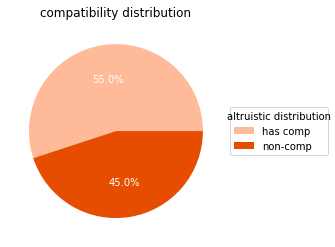

--distribution across individual sets


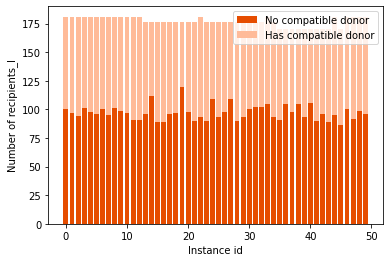

-----------------------------------------
6. recipients count distribution in the set


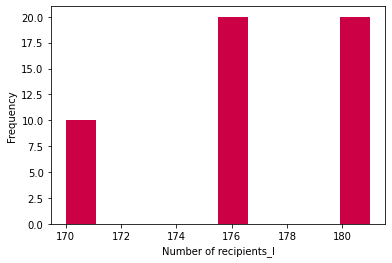

-----------------------------------------
7. recipients cPRA count distribution in the set


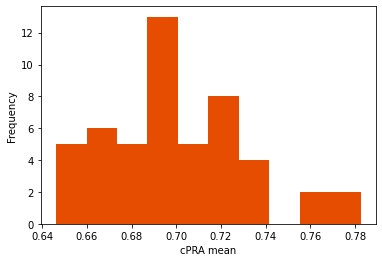

-----------------------------------------
8. recipients blodd type distribution in the set


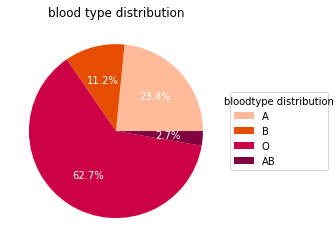

--distribution of blood type across individual sets


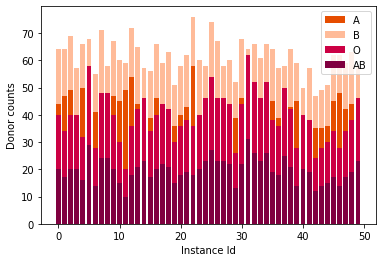

------------------------
9. Correlation Matrix


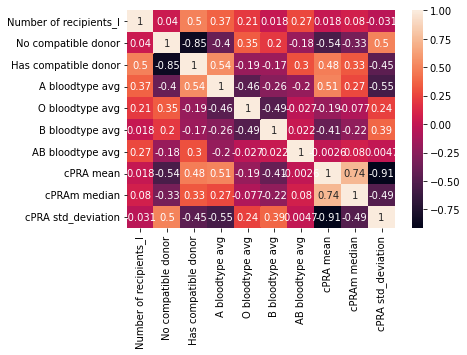

10 Plotting pairplots between the attributes


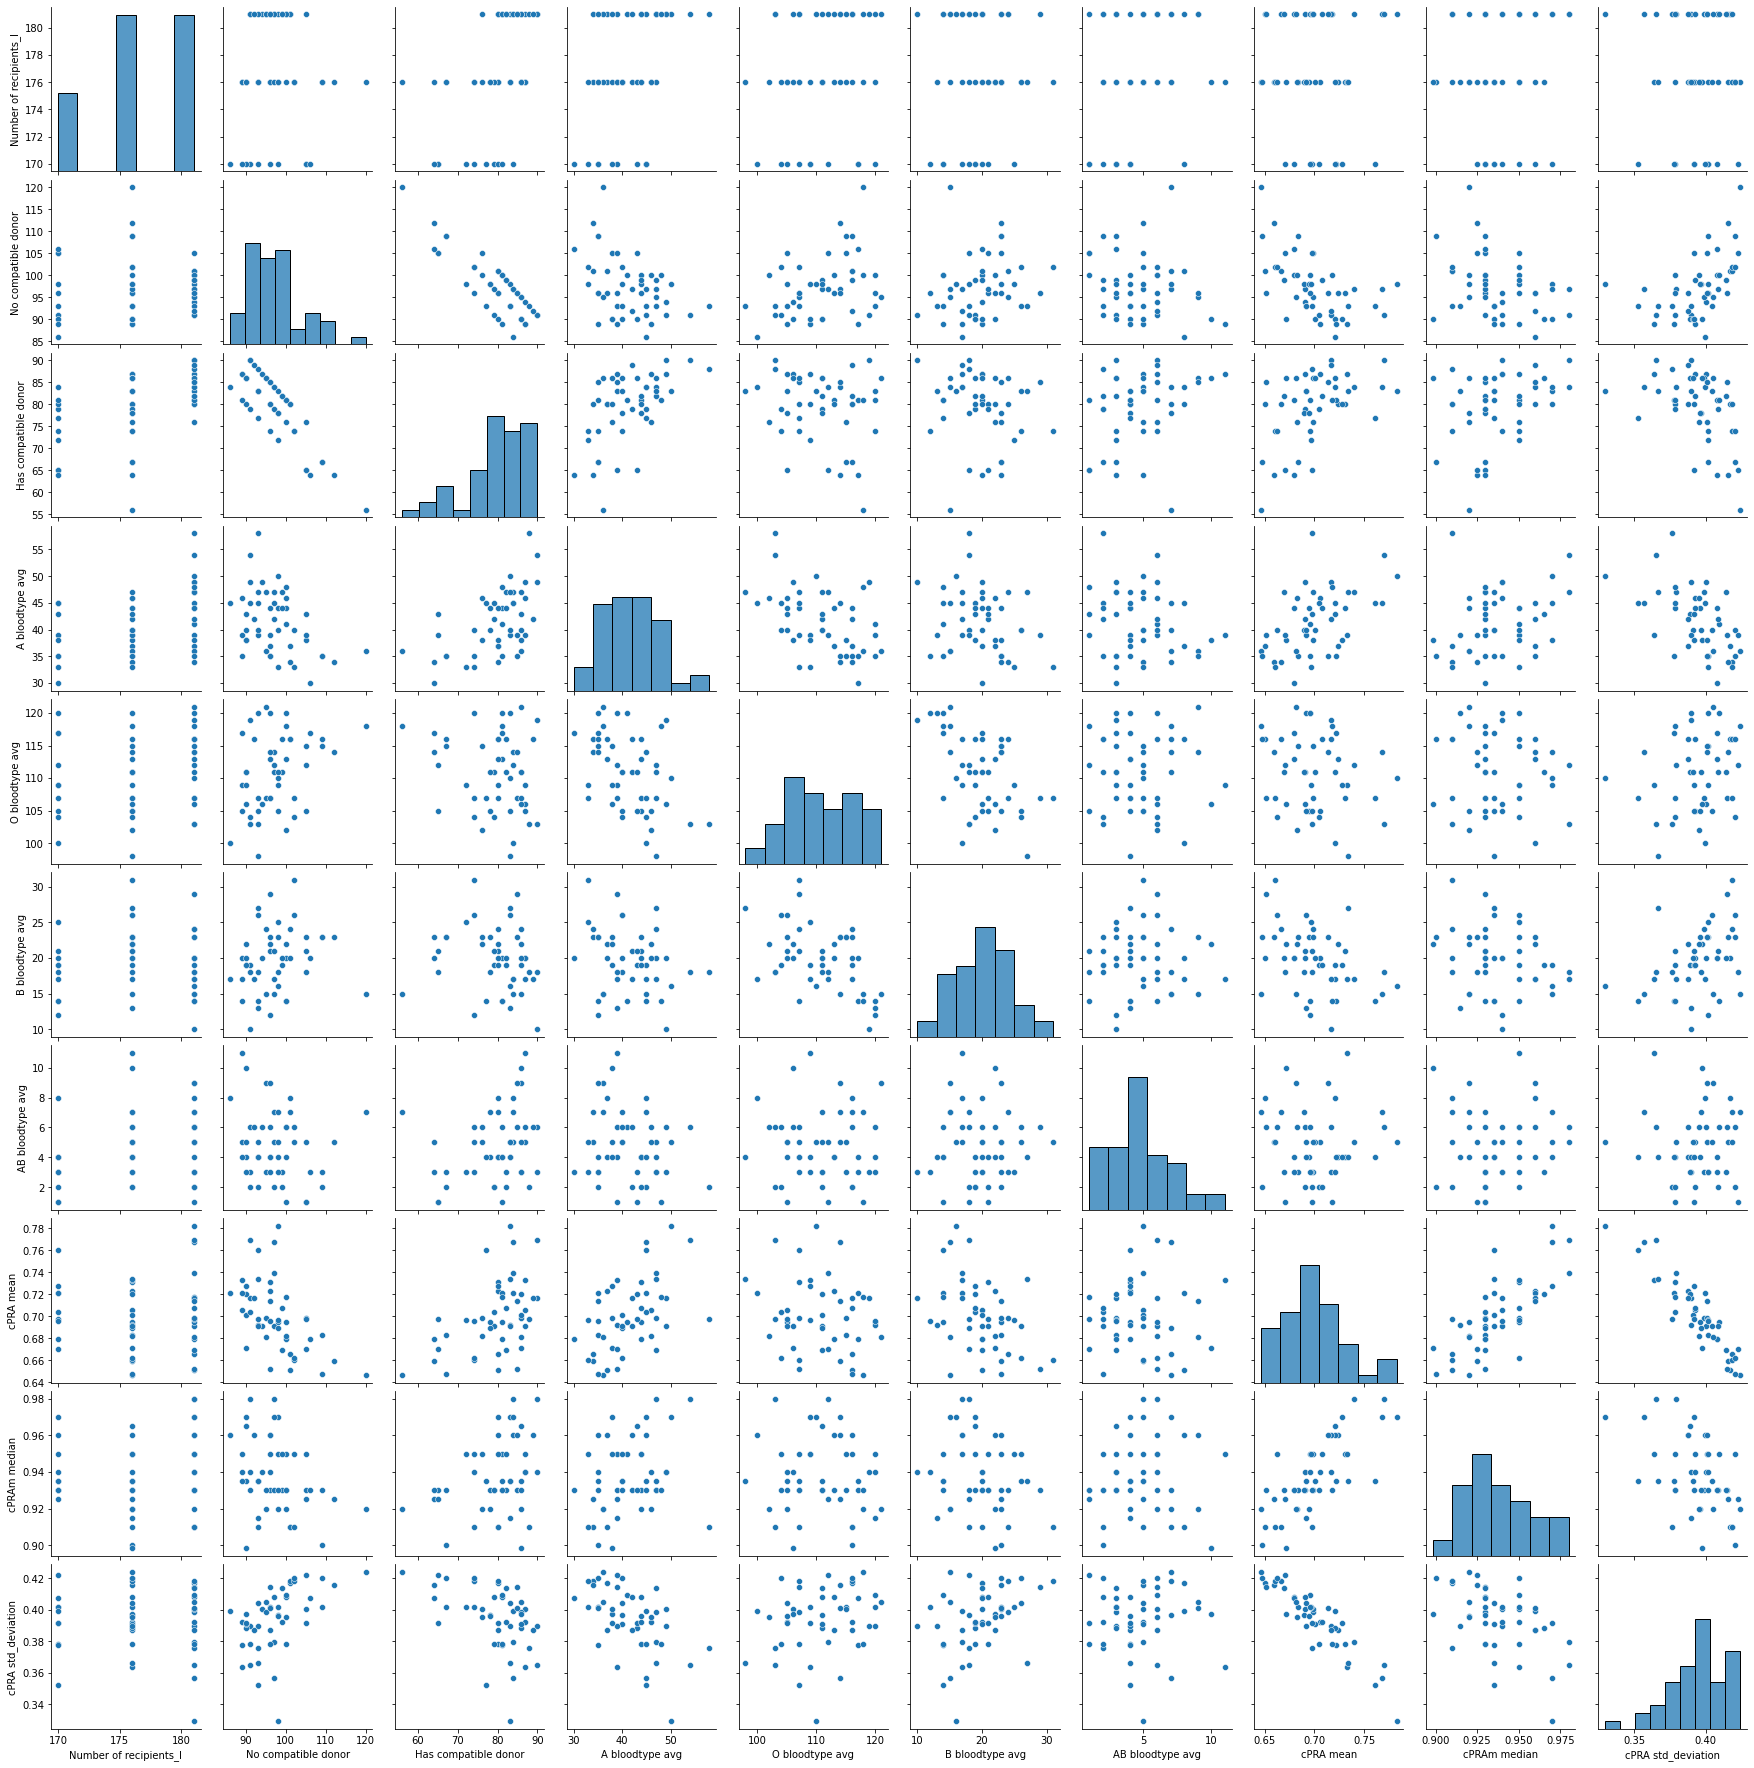

In [104]:
#@title
print("-----------------------------------------")
print("5. Distribution of recipients compatibility in the set")
y =[(x['No compatible donor'].sum()/x['Number of recipients_l'].sum()), (x['Has compatible donor'].sum()/x['Number of recipients_l'].sum())]

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(y,  colors = ['#ffbb99', '#e64d00'],
autopct = '%1.1f%%',
textprops={ 'color':'white'})
ax.legend(wedges, ['has comp','non-comp'],loc="center left",bbox_to_anchor=(1, 0, 0.5, 1),title = 'altruistic distribution' ,mode = 'expand')
plt.title ('compatibility distribution')
plt.show()

print("--distribution across individual sets")
data1 = x['No compatible donor']
data2 = x['Has compatible donor']
plt.bar(range(len(data1)), data1, color = '#e64d00')
plt.bar(range(len(data2)), data2, bottom=data1, color = '#ffbb99')
plt.xlabel('Instance id')
plt.ylabel('Number of recipients_l')
plt.legend(['No compatible donor','Has compatible donor'])
plt.show()
print("-----------------------------------------")
print("6. recipients count distribution in the set")
fig, ax = plt.subplots()
ax.hist(x['Number of recipients_l'], color = '#cc0044')
ax.set_xlabel('Number of recipients_l')
ax.set_ylabel('Frequency')
plt.show()
print("-----------------------------------------")
print("7. recipients cPRA count distribution in the set")
fig, ax = plt.subplots()
ax.hist(x['cPRA mean'], color = '#e64d00')
ax.set_xlabel('cPRA mean')
ax.set_ylabel('Frequency')
plt.show()
print("-----------------------------------------")
print("8. recipients blodd type distribution in the set")
total = x['Number of recipients_l']
a = x['A bloodtype avg']
b = x['B bloodtype avg']
c = x['O bloodtype avg']
d = x['AB bloodtype avg']

y =[(a.sum()/total.sum()),
    (b.sum()/total.sum()),
    (c.sum()/total.sum()),
    (d.sum()/total.sum())]

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(y,  colors = ['#ffbb99', '#e64d00','#cc0044', '#800040'],
autopct = '%1.1f%%',
textprops={ 'color':'white'})
ax.legend(wedges, ['A','B','O','AB'],loc="center left",bbox_to_anchor=(1, 0, 0.5, 1),title = 'bloodtype distribution' ,mode = 'expand')
plt.title ('blood type distribution')
plt.show()

print("--distribution of blood type across individual sets")
a = x['A bloodtype avg']
b = x['B bloodtype avg']
c = x['O bloodtype avg']
d = x['AB bloodtype avg']
plt.bar(range(len(a)), a, color = '#e64d00')
plt.bar(range(len(b)), b, bottom=a, color = '#ffbb99')
plt.bar(range(len(c)), b, bottom=b, color = '#cc0044')
plt.bar(range(len(d)), b,  color = '#800040')

plt.xlabel('Instance Id')
plt.ylabel('Donor counts')
plt.legend(['A','B','O','AB'])
plt.show()
print("------------------------")
print("9. Correlation Matrix")
b = x.copy()

corrMatrix = b.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

print("10 Plotting pairplots between the attributes")
sn.pairplot(x)
plt.show()

#Analysing All cycles Data

In [105]:
#@title
x = payload_listA_df.copy()
del x['Instance Ids']
a = pd.DataFrame(x.describe().iloc[[1,2,3,4,5,6,7]])
# print("1. checking for duplicate intances with similar all cycle distributions --- ")
if x.duplicated().all():
  print('1. Intances contain similar cycle distributions')
else:
  print('1. No similar cycle distribution in the set')

# filling all the null values with 0 if any
x.fillna(0)

print("2. Displaying the all cycles data distribution within the set")
x.head(10)

1. No similar cycle distribution in the set
2. Displaying the all cycles data distribution within the set


,No of Cycles,No of Two Cycles,No of Three Cycles,No of Short chains,No of Long chains,weight Avg,weight Median,weight std,No Cycles with backarcs
0,1514,140,1189,16,169,128.328019,128.571140,46.955861,1217
1,1826,140,1214,16,456,122.769412,121.077600,48.770284,1533
2,1721,105,989,58,569,116.070515,112.123260,48.748810,1376
3,2448,133,1037,76,1202,107.798946,105.077280,48.134128,2178
4,1413,85,631,50,647,108.945908,107.060520,47.046306,1126
5,5863,243,2337,149,3134,115.085231,113.095420,48.192811,5343
6,2419,135,1095,106,1083,113.172639,111.088460,49.957004,2067
7,3964,191,1894,111,1768,115.216381,113.067690,48.200066,3554
8,1886,116,623,80,1067,107.587885,103.553145,49.309088,1635
9,2880,107,919,136,1718,105.927361,104.031725,45.892591,2495


In [106]:
#@title
print("3. Analysing attributes of the all cycle dataframe")
print(x.dtypes)
print("------------------------------------------------------")
print("3. Displaying the all cycle accumulative statistics")
a

3. Analysing attributes of the all cycle dataframe
No of Cycles                 int64
No of Two Cycles             int64
No of Three Cycles           int64
No of Short chains           int64
No of Long chains            int64
weight Avg                 float64
weight Median              float64
weight std                 float64
No Cycles with backarcs      int64
dtype: object
------------------------------------------------------
3. Displaying the all cycle accumulative statistics


,No of Cycles,No of Two Cycles,No of Three Cycles,No of Short chains,No of Long chains,weight Avg,weight Median,weight std,No Cycles with backarcs
mean,2050.320000,116.860000,911.580000,69.740000,952.140000,112.449453,110.186274,47.783839,1750.940000
std,1041.012996,41.357086,451.326982,38.881195,616.950169,8.044724,9.027446,1.442881,954.704066
min,401.000000,49.000000,285.000000,5.000000,46.000000,93.178068,90.062225,44.462495,298.000000
25%,1412.250000,85.750000,616.000000,50.000000,530.000000,107.184865,104.085892,46.959717,1145.000000
50%,1824.000000,113.000000,933.000000,68.000000,931.500000,111.741992,109.568435,47.682018,1553.500000
75%,2523.000000,140.000000,1169.750000,100.000000,1279.000000,117.744715,116.555239,48.637352,2205.750000
max,5863.000000,243.000000,2337.000000,149.000000,3134.000000,131.699457,132.111460,51.165649,5343.000000


-----------------------------------------
5. cycle count distribution in the set


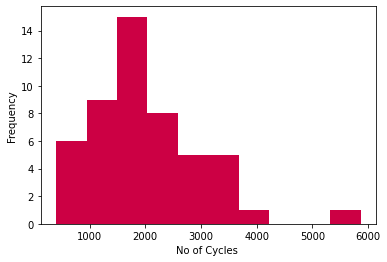

-----------------------------------------
7. cycle weight distribution in the set


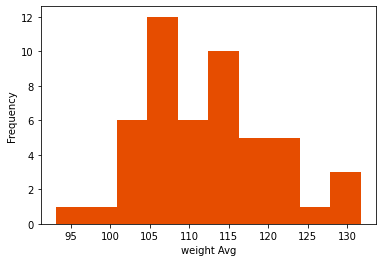

-----------------------------------------
8. cycle type distribution in the set


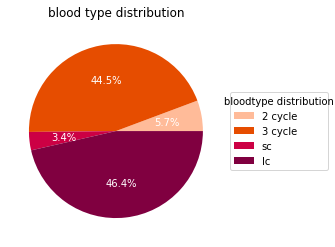

--distribution of blood type across individual sets


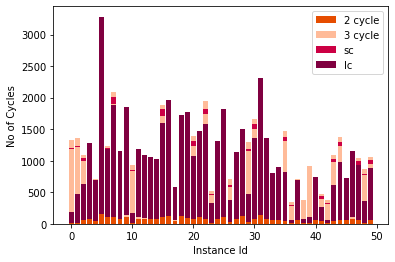

------------------------
9. Correlation Matrix


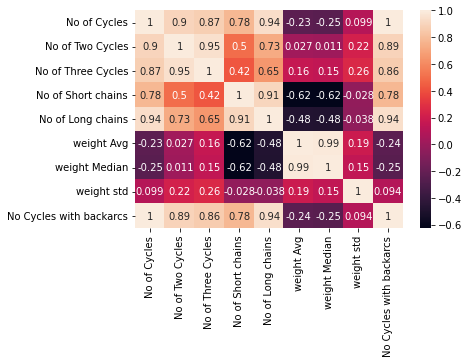

10 Plotting pairplots between the attributes


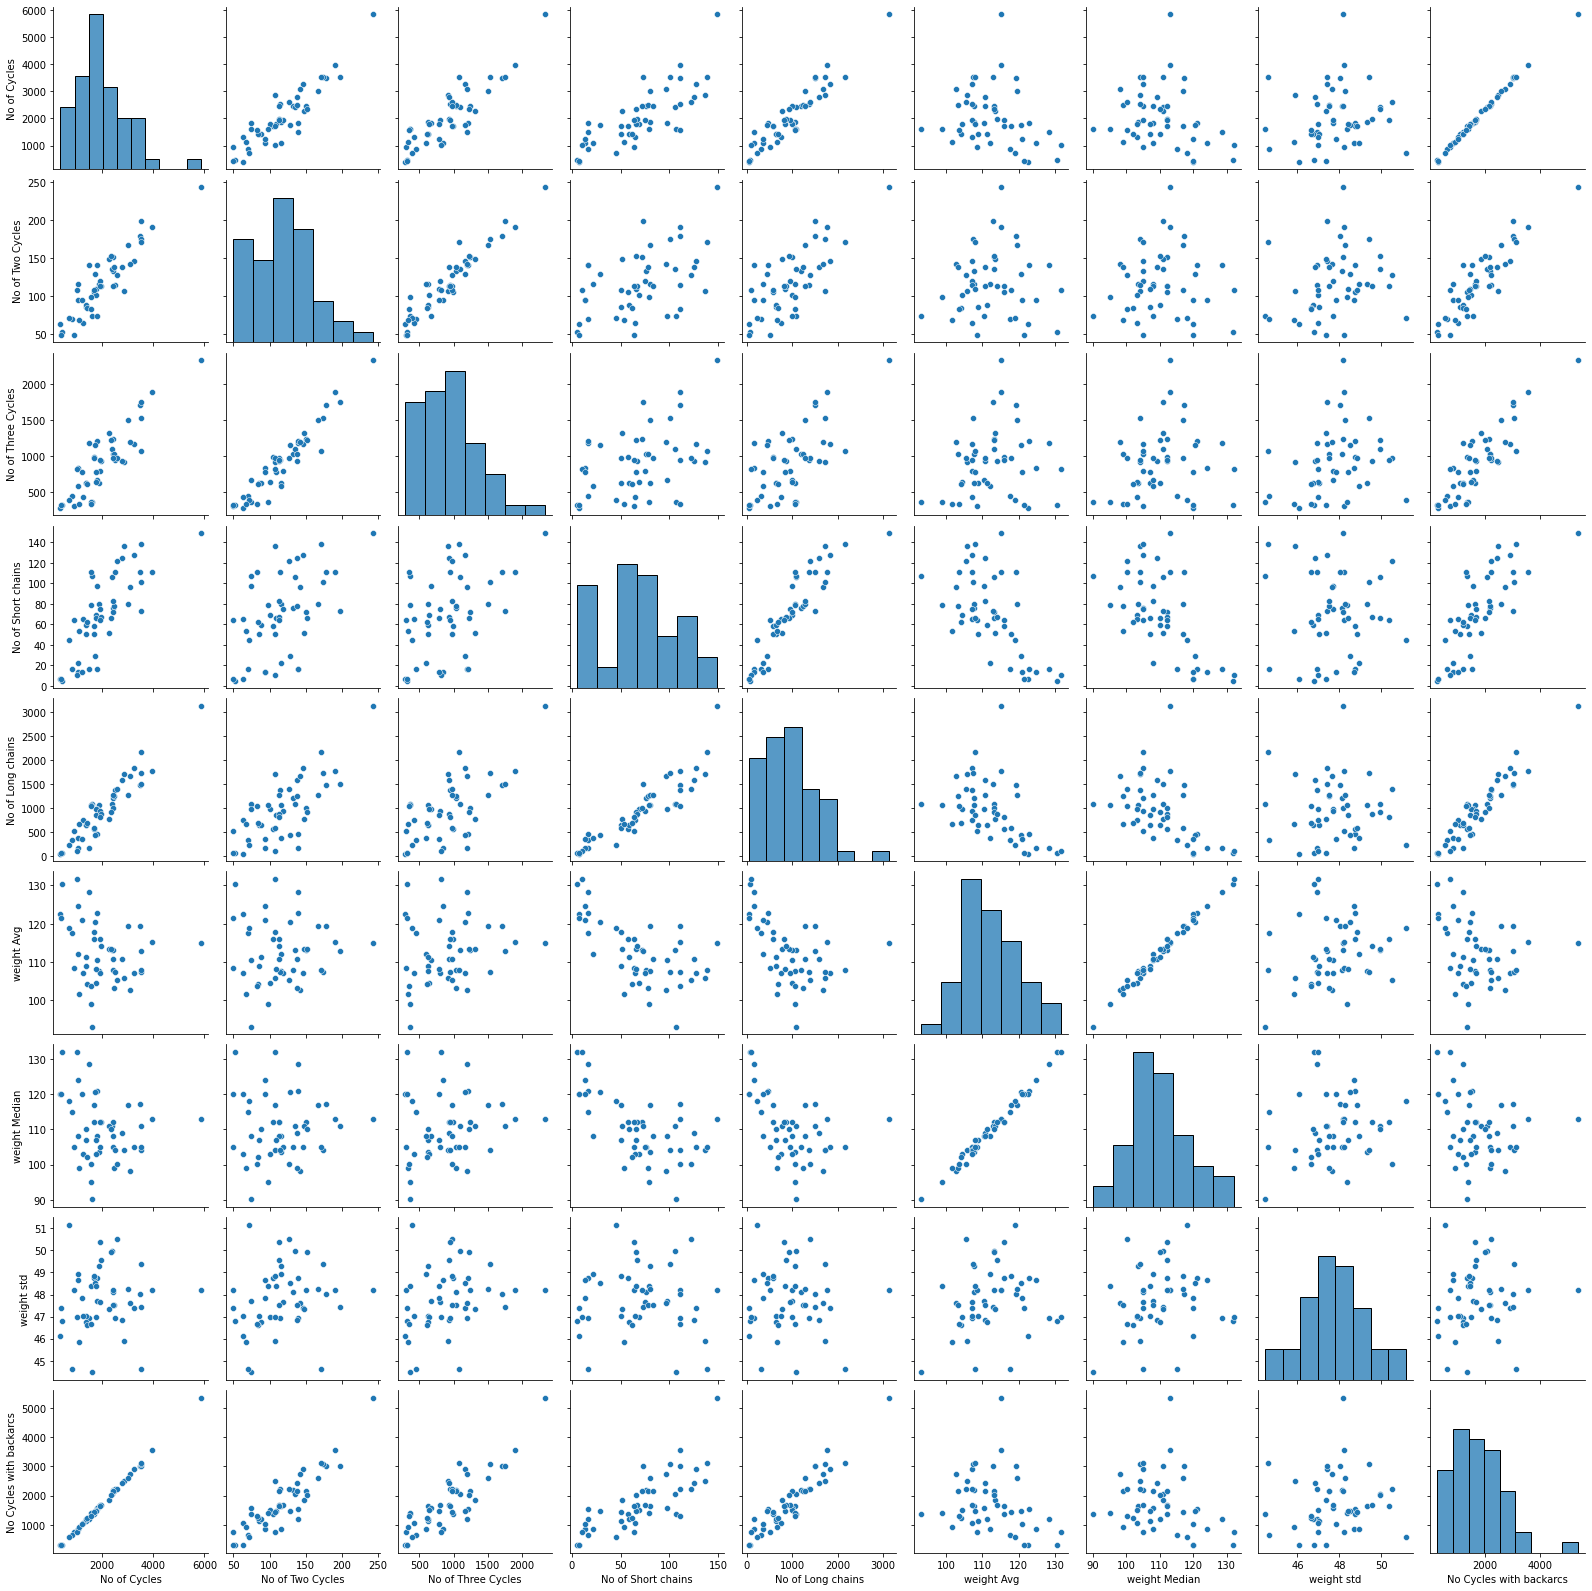

In [114]:
#@title

print("-----------------------------------------")
print("5. cycle count distribution in the set")
fig, ax = plt.subplots()
ax.hist(x['No of Cycles'], color = '#cc0044')
ax.set_xlabel('No of Cycles ')
ax.set_ylabel('Frequency')
plt.show()
print("-----------------------------------------")
print("7. cycle weight distribution in the set")
fig, ax = plt.subplots()
ax.hist(x['weight Avg'], color = '#e64d00')
ax.set_xlabel('weight Avg')
ax.set_ylabel('Frequency')
plt.show()
print("-----------------------------------------")
print("8. cycle type distribution in the set")
total = x['No of Cycles']
a = x['No of Two Cycles']
b = x['No of Three Cycles']
c = x['No of Short chains']
d = x['No of Long chains']

y =[(a.sum()/total.sum()),
    (b.sum()/total.sum()),
    (c.sum()/total.sum()),
    (d.sum()/total.sum())]

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(y,  colors = ['#ffbb99', '#e64d00','#cc0044', '#800040'],
autopct = '%1.1f%%',
textprops={ 'color':'white'})
ax.legend(wedges, ['2 cycle','3 cycle','sc','lc'],loc="center left",bbox_to_anchor=(1, 0, 0.5, 1),title = 'bloodtype distribution' ,mode = 'expand')
plt.title ('blood type distribution')
plt.show()

print("--distribution of blood type across individual sets")
total = x['No of Cycles']
a = x['No of Two Cycles']
b = x['No of Three Cycles']
c = x['No of Short chains']
d = x['No of Long chains']
plt.bar(range(len(a)), a, color = '#e64d00')
plt.bar(range(len(b)), b, bottom = a, color = '#ffbb99')
plt.bar(range(len(c)), c, bottom = b,  color = '#cc0044')
plt.bar(range(len(d)), d,  bottom = c, color = '#800040')

plt.xlabel('Instance Id')
plt.ylabel('No of Cycles')
plt.legend(['2 cycle','3 cycle','sc','lc'])
plt.show()
print("------------------------")
print("9. Correlation Matrix")
b = x.copy()

corrMatrix = b.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

print("10 Plotting pairplots between the attributes")
sn.pairplot(x)
plt.show()

#Analysing Exchange data

In [115]:
#@title
x = exchanges_listA_df.copy()
del x['Instance Ids']
a = pd.DataFrame(x.describe().iloc[[1,2,3,4,5,6,7]])
# print("1. checking for duplicate intances with similar all cycle distributions --- ")
if x.duplicated().all():
  print('1. Intances contain similar exchanges distributions')
else:
  print('1. No similar exchange distribution in the set')

# filling all the null values with 0 if any
x.fillna(0)

print("2. Displaying the exchange data distribution within the set")
x.head(10)

1. No similar exchange distribution in the set
2. Displaying the exchange data distribution within the set


,No. of Exchange Cycles,Weight of exchanges,Two - way echange,Three Way exchange,Total Transplants,Np. of two cyles,No. of three cycles,No. of short chains,No. of long chains,Cycle Containing Backarcs,Avg weight of exc cycles,Median weight of exc cycles,Std weight of exc cycles
0,25,3944.07032,6,19,69,6,17,0,2,13,157.762813,164.06956,45.075622
1,25,3775.19705,6,19,69,4,19,2,0,14,151.007882,161.08750,56.487471
2,27,4183.42056,2,25,79,2,23,0,2,14,154.941502,168.10636,56.831972
3,27,4363.11606,9,18,72,8,17,1,1,13,161.596891,159.04100,49.081432
4,27,3543.02851,11,16,70,11,14,0,2,11,131.223278,135.12082,52.218216
5,24,4223.02036,2,22,70,2,20,0,2,18,175.959182,170.57701,48.930020
6,26,4328.19817,5,21,73,5,19,0,2,14,166.469160,174.61946,57.195590
7,27,4369.24638,5,22,76,5,20,0,2,18,161.823940,171.09982,46.980665
8,27,3605.82306,12,15,69,12,13,0,2,6,133.549002,132.06050,46.399529
9,23,3658.94796,1,22,68,1,20,0,2,13,159.084694,164.05245,40.477359


In [116]:
#@title
print("3. Analysing attributes of the dorecipient dataframe")
print(x.dtypes)
print("------------------------------------------------------")
print("4. Displaying the exchange accumulative statistics")
a

3. Analysing attributes of the dorecipient dataframe
No. of Exchange Cycles           int64
Weight of exchanges            float64
Two - way echange                int64
Three Way exchange               int64
Total Transplants                int64
Np. of two cyles                 int64
No. of three cycles              int64
No. of short chains              int64
No. of long chains               int64
Cycle Containing Backarcs        int64
Avg weight of exc cycles       float64
Median weight of exc cycles    float64
Std weight of exc cycles       float64
dtype: object
------------------------------------------------------
4. Displaying the exchange accumulative statistics


,No. of Exchange Cycles,Weight of exchanges,Two - way echange,Three Way exchange,Total Transplants,Np. of two cyles,No. of three cycles,No. of short chains,No. of long chains,Cycle Containing Backarcs,Avg weight of exc cycles,Median weight of exc cycles,Std weight of exc cycles
mean,23.740000,3654.003787,5.060000,18.68000,66.160000,4.740000,16.800000,0.320000,1.880000,12.700000,153.734807,157.458600,50.902880
std,3.932128,678.442409,2.606194,4.00734,11.285461,2.545985,3.811904,0.551066,0.798979,3.265466,12.389660,16.122801,7.229059
min,13.000000,1848.949860,0.000000,9.00000,35.000000,0.000000,8.000000,0.000000,0.000000,6.000000,130.657573,129.090060,34.273905
25%,21.000000,3250.252827,3.000000,16.00000,59.000000,3.000000,14.000000,0.000000,1.000000,10.250000,148.429743,146.330640,46.302115
50%,24.000000,3642.259540,5.000000,18.00000,68.500000,4.000000,16.000000,0.000000,2.000000,13.000000,154.085791,159.050218,50.879042
75%,27.000000,4181.843273,6.000000,22.00000,74.000000,6.000000,20.000000,1.000000,2.000000,14.750000,161.767178,168.102503,55.436504
max,30.000000,4972.305580,12.000000,28.00000,84.000000,12.000000,25.000000,2.000000,3.000000,19.000000,182.138806,202.618790,68.963318


-----------------------------------------
5. exchange cycle count distribution in the set


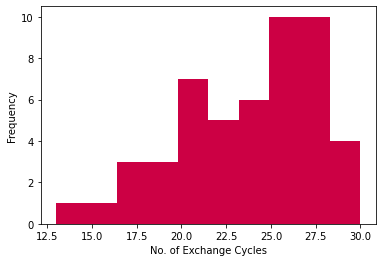

-----------------------------------------
7. exchange cycle weight distribution in the set


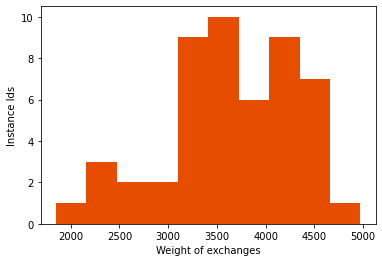

-----------------------------------------
8. No. of Transplants distribution in the set


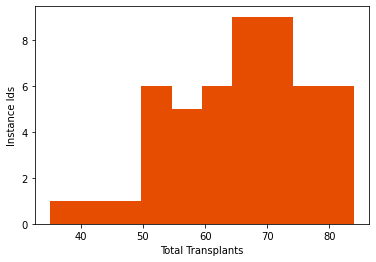

-----------------------------------------
8. cycle type distribution in the set


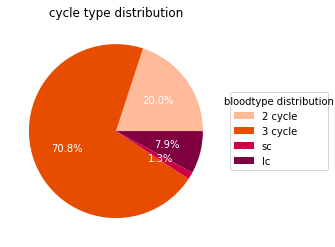

--distribution of cycle type across individual sets


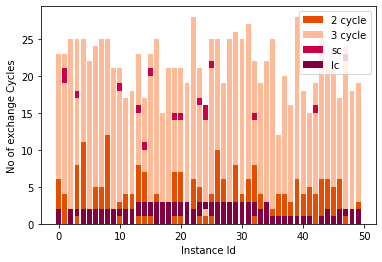

------------------------
9. Correlation Matrix


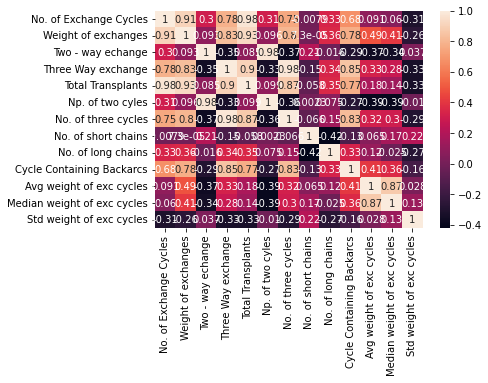

10 Plotting pairplots between the attributes


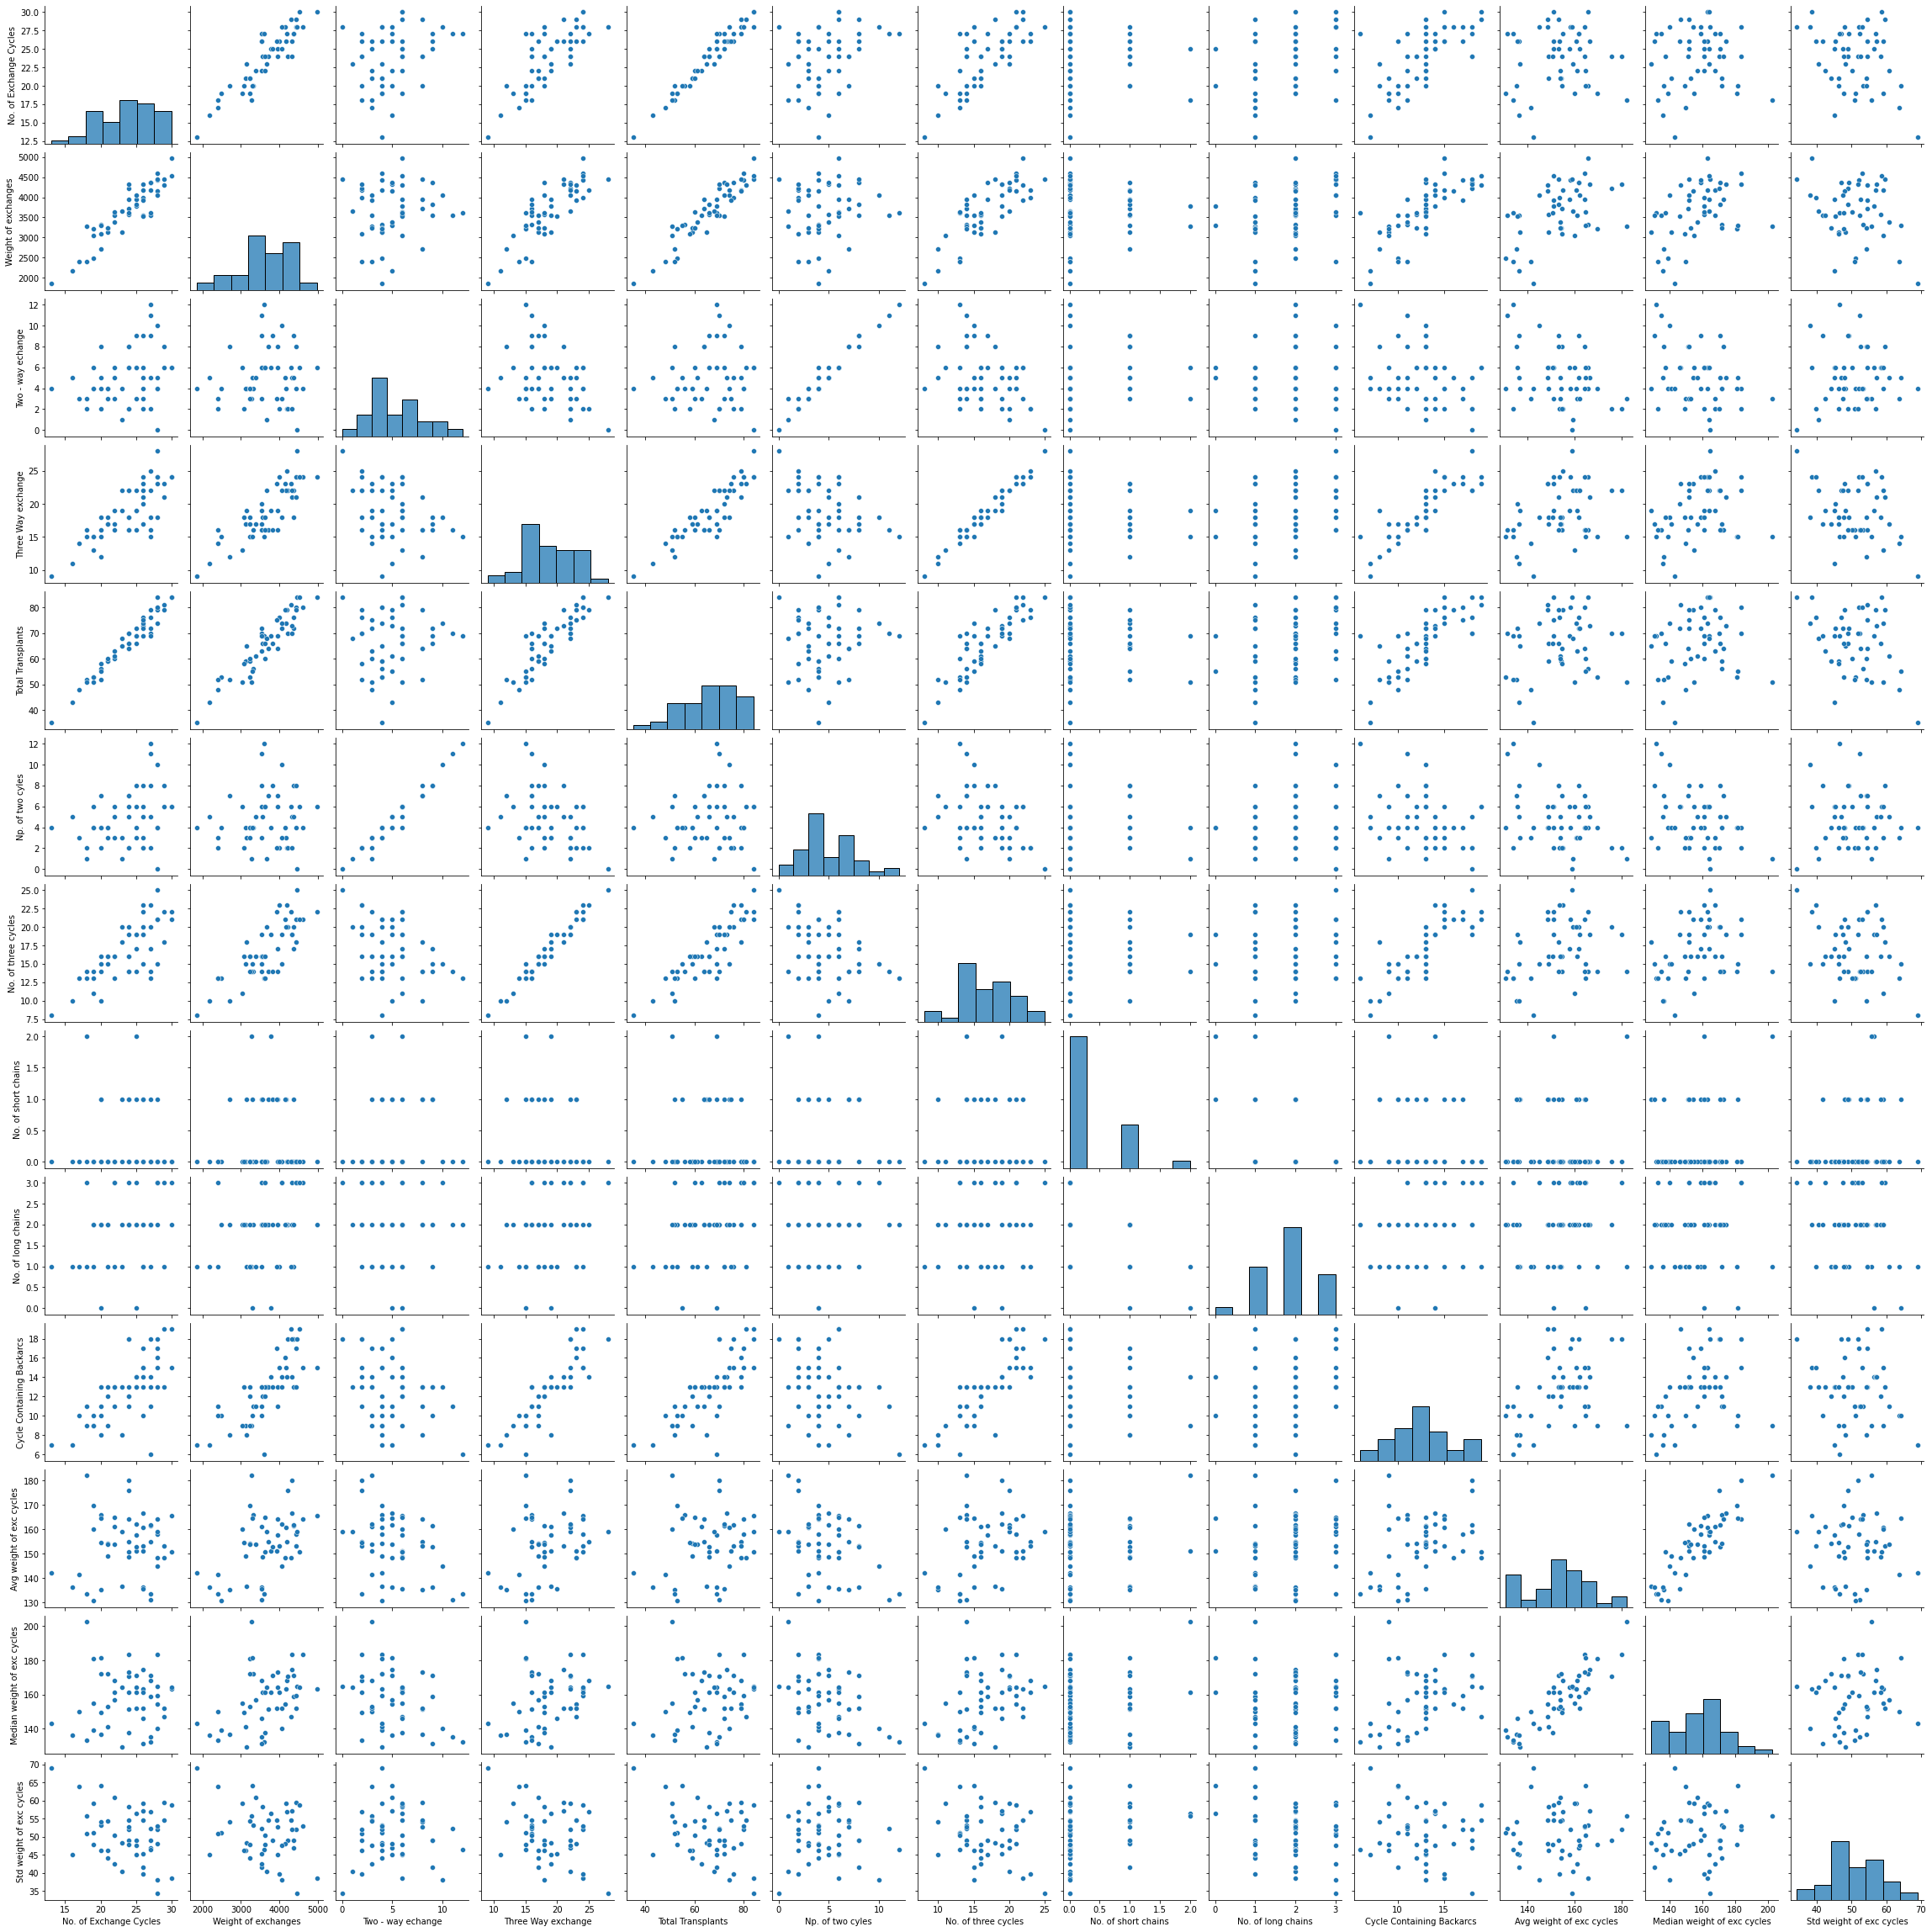

In [117]:
#@title

print("-----------------------------------------")
print("5. exchange cycle count distribution in the set")
fig, ax = plt.subplots()
ax.hist(x['No. of Exchange Cycles'], color = '#cc0044')
ax.set_xlabel('No. of Exchange Cycles')
ax.set_ylabel('Frequency')
plt.show()
print("-----------------------------------------")
print("7. exchange cycle weight distribution in the set")
fig, ax = plt.subplots()
ax.hist(x['Weight of exchanges'], color = '#e64d00')
ax.set_xlabel('Weight of exchanges')
ax.set_ylabel('Instance Ids')
plt.show()
print("-----------------------------------------")

print("8. No. of Transplants distribution in the set")
fig, ax = plt.subplots()
ax.hist(x['Total Transplants'], color = '#e64d00')
ax.set_xlabel('Total Transplants')
ax.set_ylabel('Instance Ids')
plt.show()
print("-----------------------------------------")
print("8. cycle type distribution in the set")

 
total = x['No. of Exchange Cycles']
a = x['Np. of two cyles']
b = x['No. of three cycles']
c = x['No. of short chains']
d = x['No. of long chains']

y =[(a.sum()/total.sum()),
    (b.sum()/total.sum()),
    (c.sum()/total.sum()),
    (d.sum()/total.sum())]

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(y,  colors = ['#ffbb99', '#e64d00','#cc0044', '#800040'],
autopct = '%1.1f%%',
textprops={ 'color':'white'})
ax.legend(wedges, ['2 cycle','3 cycle','sc','lc'],loc="center left",bbox_to_anchor=(1, 0, 0.5, 1),title = 'bloodtype distribution' ,mode = 'expand')
plt.title ('cycle type distribution')
plt.show()

print("--distribution of cycle type across individual sets")

 
total = x['No. of Exchange Cycles']
a = x['Np. of two cyles']
b = x['No. of three cycles']
c = x['No. of short chains']
d = x['No. of long chains']
plt.bar(range(len(a)), a, color = '#e64d00')
plt.bar(range(len(b)), b, bottom = a, color = '#ffbb99')
plt.bar(range(len(c)), c, bottom = b,  color = '#cc0044')
plt.bar(range(len(d)), d,  bottom = c, color = '#800040')

plt.xlabel('Instance Id')
plt.ylabel('No of exchange Cycles')
plt.legend(['2 cycle','3 cycle','sc','lc'])
plt.show()
print("------------------------")
print("9. Correlation Matrix")
b = x.copy()

corrMatrix = b.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

print("10 Plotting pairplots between the attributes")
sn.pairplot(x)
plt.show()

In [ ]:
# @title hidden cells
c = df[['total','cpra_value']][(df['total'] > 1)& (df['cpra_value']!=0.0) ]
a = c.sort_values('cpra_value')
r = range(int(a['cpra_value'].min() * 100),int(a['cpra_value'].max() * 100) + 1)
sequence_of_numbers = [round((number * 0.01),2) for number in r ]
sequence_of_numbers
temp = {'cpra_value' : sequence_of_numbers}
temp_df = pd.DataFrame(temp)
x = pd.merge(c,temp_df, how = 'outer').fillna(0)
x = x.sort_values('cpra_value')
plt.plot(x['cpra_value'], x['total'])

#  d = df[['total','cpra_value']][(df['cpra_value']==0.0) ]
#  type(d['total'].iloc[0])

zero_cPRA = []
total_cpra = {}
total_cpral = []
def plot_cpra_distribution(recipient_list,axs,title, axs1):
  cpradf_list = []
  for recipients in recipient_list:
    cpradf = Calculate_unique_cpra(recipients)
    cpradf_list.append(cpradf)

  df = reduce(lambda  left,right: pd.merge(left,right,on=['cpra_value'],
                                              how='outer'), cpradf_list).fillna(0)

  df['total']=df.loc[:, df.columns != 'cpra_value'].sum(axis=1)

  b = df[df['total'] > 1].copy()
  b['cpra_value'] = round(b['cpra_value'],2)
  a = b.sort_values('cpra_value')
  r = range(0,101)


  sequence_of_numbers = [round((number * 0.01),2) for number in r ]
  temp = {'cpra_value' : sequence_of_numbers}
  temp_df = pd.DataFrame(temp)
  temp_df
  x = pd.merge(b,temp_df, how = 'outer').fillna(0)
  x = x.sort_values('cpra_value')

  # plt.plot(x['cpra_value'], x['total'])
  a = x['cpra_value']
  b = x['total']
  axs.set_title(title)
  axs.set(xlabel='cPRA value', ylabel='No. of Recipients')
  # axs.label_outer()
  axs.set_xticks(np.arange(min(a), max(a), 0.05), minor=False)

  axs.set_yticks(np.arange(min(b), max(b), 200))
  # plt.show()
  axs.plot(x['cpra_value'], x['total'])

  c = df[['total','cpra_value']][(df['total'] > 1)& (df['cpra_value']!=0.0) ]
  a = c.sort_values('cpra_value')
  r = range(int(a['cpra_value'].min() * 100),int(a['cpra_value'].max() * 100) + 1)
  sequence_of_numbers = [round((number * 0.01),2) for number in r ]
  sequence_of_numbers
  temp = {'cpra_value' : sequence_of_numbers}
  temp_df = pd.DataFrame(temp)
  x = pd.merge(c,temp_df, how = 'outer').fillna(0)
  x = x.sort_values('cpra_value')
  a = x['cpra_value']
  b = x['total']
  axs1.set_title(title)
  axs1.set(xlabel='cPRA value', ylabel='No. of Recipients')
  axs1.set_xticks(np.arange(min(a), max(a), 0.01), minor=False)

  axs1.set_yticks(np.arange(min(b), max(b), 200))
  axs1.plot(x['cpra_value'], x['total'])

  sn.distplot(x)

  d = df[['total','cpra_value']][(df['cpra_value']==0.0) ]
  zero_cPRA.append(d['total'].iloc[0])

  c = df[['total','cpra_value']][(df['total'] > 1)]
  total_cpra = {title : c['total'],'cpra_value' : c['cpra_value']}
  total_cpral.append(total_cpra)
  

total_cpra = pd.DataFrame(total_cpra)
df = reduce(lambda  left,right: pd.merge(left,right,on=['cpra_value'],
                                              how='outer'), total_cpra).fillna(0)
df

asd = {'zero CPRA' :zero_cPRA, 'sets' : ['A','B','C','D','E','F','G']}
pasd = pd.DataFrame(asd)
# plt.bar(data=, x="sets",y='zero CPRA')
plt.hist(pasd)

fig, axs = plt.subplots(3, 3,figsize=(20,20))
fig.delaxes(axs[2][1])
fig.delaxes(axs[2][2])
fig1, axs1 = plt.subplots(3, 3,figsize=(20,20))
fig1.delaxes(axs1[2][1])
fig1.delaxes(axs1[2][2])
plot_cpra_distribution(all_set_recipients[0],axs[0,0],'Set A',axs1[0,0])
plot_cpra_distribution(all_set_recipients[1],axs[0,1],'Set B',axs1[0,1])
plot_cpra_distribution(all_set_recipients[2],axs[0,2],'Set C',axs1[0,2])
plot_cpra_distribution(all_set_recipients[3],axs[1,0],'Set D',axs1[1,0])
plot_cpra_distribution(all_set_recipients[4],axs[1,1],'Set E',axs1[1,1])
plot_cpra_distribution(all_set_recipients[5],axs[1,2],'Set F',axs1[1,2])
plot_cpra_distribution(all_set_recipients[6],axs[2,0],'Set G',axs1[2,0])
# for recipient_list in all_set_recipients:
#   plot_cpra_distribution(recipient_list,axs[0,1])



axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()





# for i in cpradf_list:
#   print(i.head(5))

# temp = pd.merge(cpradf_list[0],cpradf_list[1], on = 'cpra_value', how = 'outer').fillna(0)
# temp1 = pd.merge(temp,cpradf_list[2], on = 'cpra_value', how = 'outer').fillna(0)
# b = pd.merge(temp1,cpradf_list[3], on = 'cpra_value', how = 'outer').fillna(0)
# # temp3 = pd.merge(temp2,cpradf_list[4], on = 'cpra_value', how = 'outer').fillna(0)
# # b = pd.merge(temp3,cpradf_list[4], on = 'cpra_value', how = 'outer').fillna(0)


# b['total'] = b['number_of_recipients_y'] +b['number_of_recipients_x']

from functools import reduce
cpradf_list = []
for recipients in recipients_list:
  cpradf = Calculate_unique_cpra(recipients)
  cpradf_list.append(cpradf)

df = reduce(lambda  left,right: pd.merge(left,right,on=['cpra_value'],
                                            how='outer'), cpradf_list).fillna(0)
# df.loc[:, df.columns != 'b']

# df['total'] = df[df.columns != 'b'].sum(axis=1)
df['total']=df.loc[:, df.columns != 'cpra_value'].sum(axis=1)


b = df
b['cpra_value'] = round(b['cpra_value'],2)
a = b.sort_values('cpra_value')
# a.plot.line(y = 'total', x ='cpra_value')
r = range(0,101)


sequence_of_numbers = [round((number * 0.01),2) for number in r ]
temp = {'cpra_value' : sequence_of_numbers}
temp_df = pd.DataFrame(temp)
temp_df
x = pd.merge(b,temp_df, how = 'outer').fillna(0)
x = x.sort_values('cpra_value')

plt.plot(x['cpra_value'], x['total'])
a = x['cpra_value']
b = x['total']
plt.title("Plot Smooth Curve Using the scipy.interpolate.make_interp_spline() Class")
plt.xlabel("X")
plt.ylabel("Y")
plt.xticks(np.arange(min(a), max(a), 0.05))
plt.yticks(np.arange(min(b), max(b), 5))
plt.show()
b